<a href="https://colab.research.google.com/github/HyeJiJUN11/DataAnalysisProgramming/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# **Project**
202013340 전혜지

In [ ]:
data = pd.read_csv('/content/서울시 노원구 식품위생업소 행정처분내역 현황.csv', encoding='euc-kr', parse_dates=['처분일자']);
data = data.drop(['교부번호', '소재지지번', '소재지도로명', '지도점검일자', '행정처분상태', '위반일자', '운영형태', '외부적발접수일자', '적발기관명(적발기관)'], axis=1)

data['Year'] = data['처분일자'].dt.year 
data = data[(data.Year > 2000) & (data.Year<2021)]
data.head()

,시군구코드,처분일자,업종명,업태명,업소명,처분명,위반내역분류,법적근거,위반내용,처분내용,처분기간,적발구분,신고구분,영업장면적(㎡),Year
0,3100000,2004-09-14,일반음식점,호프/통닭,원샷,영업정지2월,NaN,식품위생법제31조,청소년주류제공1차,영업정지2월,NaN,기타,2,62.32,2004
1,3100000,2005-09-23,일반음식점,분식,동호,영업정지 7일갈음 과징금 84만원,NaN,식품위생법 제65조,영업장면적 무단변경,영업정지 7일갈음 과징금 84만원,7.0,수시,,18.42,2005
2,3100000,2007-08-20,일반음식점,분식,동호,시정명령,NaN,식품위생법 제21조,영업장외영업,시정명령,NaN,기타,,18.42,2007
3,3100000,2007-10-18,일반음식점,분식,동호,과징금부과(56만원),NaN,식품위생법 제21조,영업장외 영업(탁자),과징금부과(56만원),7.0,수시,,18.42,2007
4,3100000,2005-10-24,일반음식점,분식,천궁,시정명령,NaN,식품위생법 제55조,이물혼입,시정명령,NaN,수시,,110.30,2005


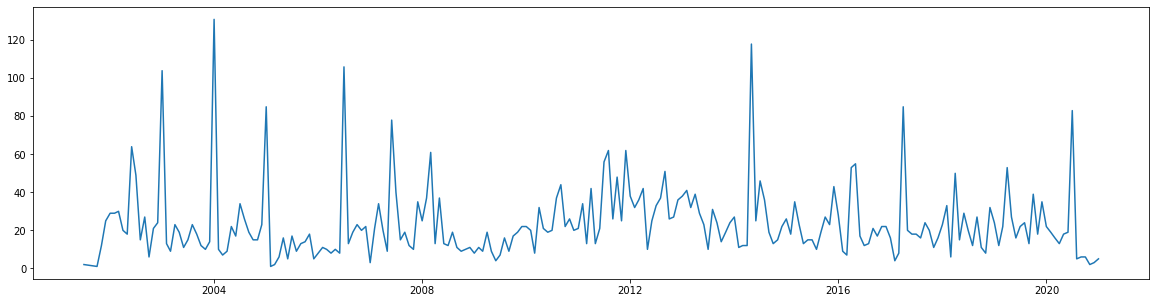

In [ ]:
data_dates = data['처분일자'].value_counts()
dates = data_dates.to_frame(name='위반횟수')
dates.index.name = '처분일자'
dates.sort_values(by=['처분일자'])

dates = dates.resample('M').sum()
dates = dates[dates.위반횟수 != 0]
#dates = dates.sort_values(by='위반횟수', ascending=False)

plt.figure(figsize=(20, 5))
plt.plot(dates.index, dates.위반횟수)